# Pets Identification with PyTorch and fastai

In [1]:
from fastai.vision.all import *

In [2]:
workpath = Path('/home/hiromi.suenaga/git/pets/')
modelpath = workpath/'model'
path = untar_data(URLs.PETS)

In [3]:
files = get_image_files(path/"images")
len(files)

7390

### Create a learner 

In [4]:
dls = ImageDataLoaders.from_name_re(path, files, r'^(.*)_\d+.jpg', item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

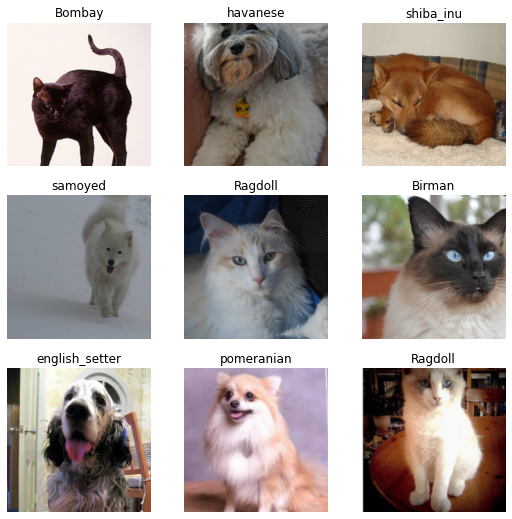

In [5]:
dls.show_batch(max_n=9)

In [6]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])

## Training

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.004365158267319202)

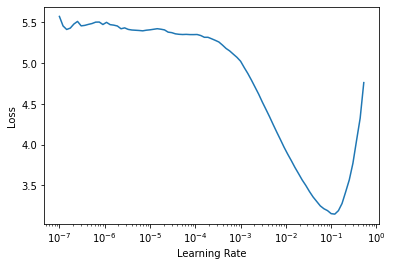

In [7]:
learn.lr_find()

In [8]:
learn.fit_one_cycle(8, 3e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.036997,2.728256,0.460081,0.539919,00:18
1,1.684624,1.310526,0.315968,0.684032,00:21
2,0.992076,0.726298,0.213126,0.786874,00:22
3,0.808401,0.517702,0.154263,0.845737,00:21
4,0.637668,0.382396,0.123816,0.876184,00:22
5,0.467123,0.275119,0.088633,0.911367,00:21
6,0.323491,0.229467,0.079838,0.920162,00:22
7,0.249211,0.218311,0.069012,0.930988,00:22


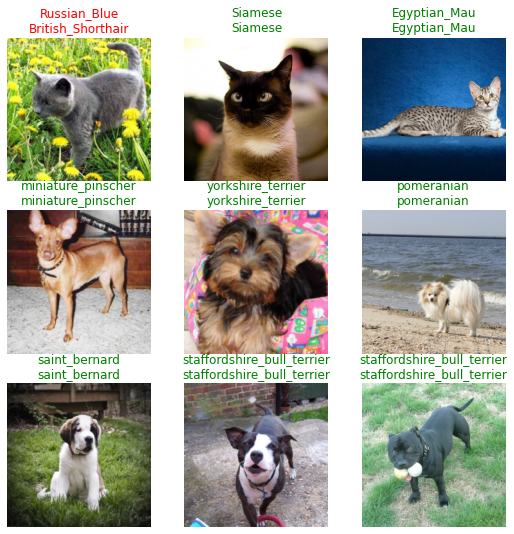

In [9]:
learn.show_results()

In [10]:
interp = Interpretation.from_learner(learn)


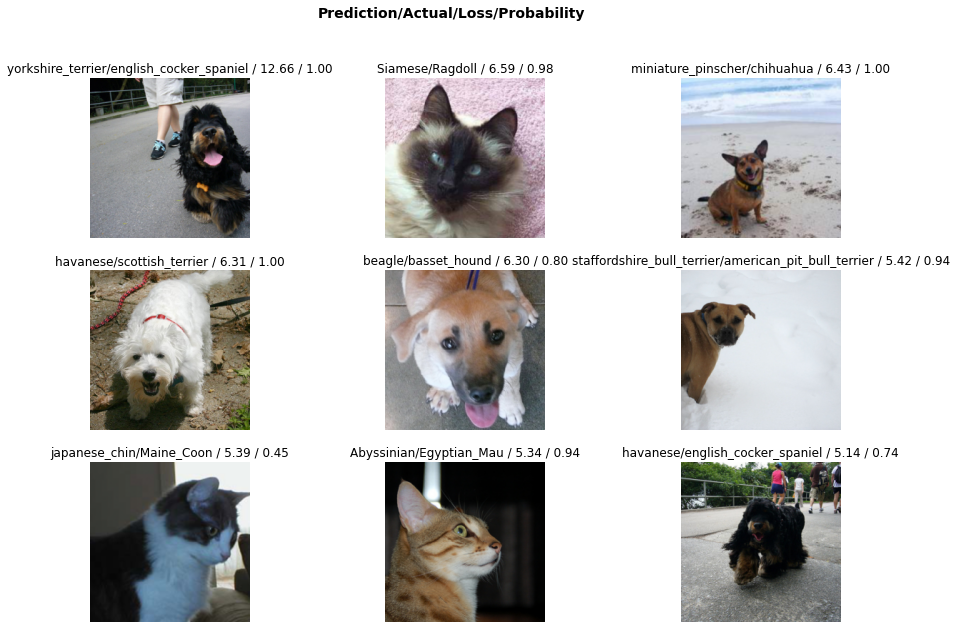

In [11]:
interp.plot_top_losses(9, figsize=(15,10))

In [12]:
file = learn.save(workpath/'model/model')

Above line took 1h 0m 39s

## Predicting

In [13]:
learn.load(workpath/'model/model')

In [14]:
pic1 = PILImage.create('examples/1.jpg')
pic2 = PILImage.create('examples/2.jpg')

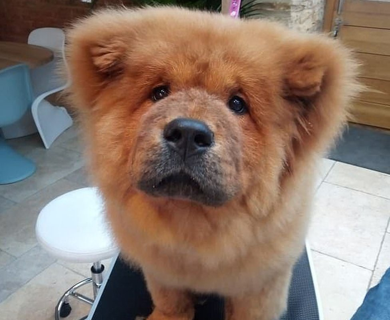

In [15]:
pic1.resize([390, 320])

In [16]:
label, _, _ = learn.predict(pic1)
label

'pomeranian'

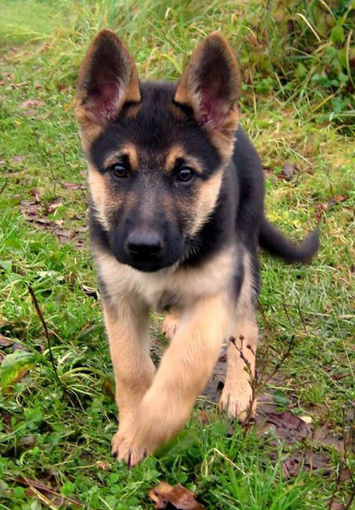

In [17]:
pic2.resize([355,510])

In [18]:
label, _, _ = learn.predict(np.array(pic2))
label

'shiba_inu'